<h1>Welcome to Pyber</h1>
<h2>Experience the Future in Motion</h2>
<p>Pyber is a privately held rideshare company operating in 120 cities in parts of the United States and Canada. Pyber serves a broad range of municipality sizes with "fare"ness in mind. With 2016 under wraps, let's take a look back and see how well we met our customers' high standards of availability and affordability.</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
result =pd.merge(ride_df, city_df, how='left')

# Display the data table for preview
result.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#DataFrames per City Type

urban_data = result.loc[result['type'] == 'Urban']
suburban_data = result.loc[result['type'] == 'Suburban']
rural_data = result.loc[result['type'] == 'Rural']

In [3]:
#Urban Coordinates

urban_x = urban_data.groupby(['type', 'city'])['ride_id'].count()
urban_y = urban_data.groupby(['type', 'city'])['fare'].mean()
urban_x_df = pd.DataFrame(urban_x)
urban_y_df = pd.DataFrame(urban_y)

In [4]:
#Suburban Coordinates

suburban_x = suburban_data.groupby(['type', 'city'])['ride_id'].count()
suburban_y = suburban_data.groupby(['type', 'city'])['fare'].mean()
suburban_x_df = pd.DataFrame(suburban_x)
suburban_y_df = pd.DataFrame(suburban_y)

In [5]:
#Rural Coordinates

rural_x = rural_data.groupby(['type', 'city'])['ride_id'].count()
rural_y = rural_data.groupby(['type', 'city'])['fare'].mean()
rural_x_df = pd.DataFrame(rural_x)
rural_y_df = pd.DataFrame(rural_y)

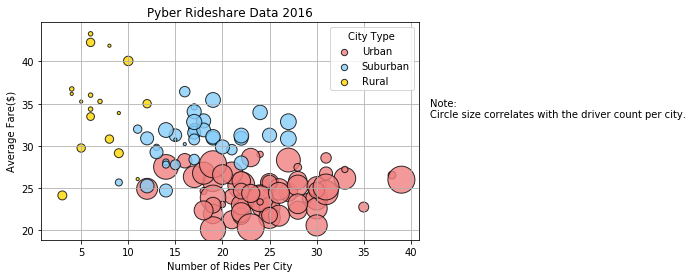

In [6]:
#Full Scatter Plot Set
#lgd = plot.legend()
#lgd.legendhandles[index]._sizes=[40]
#Index should be for all three index locations 0,1,2

plt.scatter(urban_x_df, urban_y_df, s=urban_data['driver_count']*10, color='LightCoral', alpha=0.8, edgecolor='black', label='Urban')
plt.scatter(suburban_x_df, suburban_y_df, s=suburban_data['driver_count']*10, color='LightSkyBlue', alpha=0.8, edgecolor='black', label='Suburban')
plt.scatter(rural_x_df, rural_y_df, s=rural_data['driver_count']*10, color='Gold', alpha=0.8, edgecolor='black', label='Rural')
plt.xlabel("Number of Rides Per City")
plt.ylabel("Average Fare($)")
plt.title("Pyber Rideshare Data 2016")
plt.grid()
plt.legend()
textstr = 'Note:\nCircle size correlates with the driver count per city.\n'
plt.text(42, 32, textstr, fontsize=10)
plt.subplots_adjust(right=1.0)
lgnd = plt.legend(title="City Type")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
plt.savefig('RideShareData.png')
plt.show()

<h2>High Level Analysis</h2>
<p>We can see from this high level perspective that the majority of urban riders enjoy fares below an average of \$30 per ride. However, the number of drivers in the area at any given time can play a large role in the cost of fares. As demand increases, so do fares. The cluster of fares above the average \$25 in cities with roughly 20 to 30 drivers may indicate that demand is still too high for how many drivers are working the area. This can also be attributed to time of day and any events in the nearby city that could drive demand up past our service level support</p>

<p>Rural drivers are in short supply, driving up the cost of fares in some rural areas up to an average of as much as \$45 per ride. High fares keep rural riders from utilizing the service. It's possible that we should be incentivizing rural riders and rural drivers to bring fare levels down and increase activity in rural areas.</p>

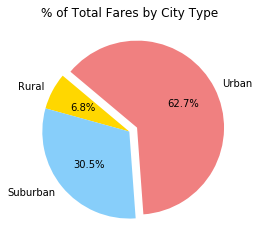

In [7]:
#City Type Percentage Fare of the Whole

type_fare_total = result.groupby('type').agg({'fare': 'sum'})
result_fare_total = result['fare'].sum()
type_fare_percent = round((type_fare_total / result_fare_total) * 100, 2)

colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
plt.pie(type_fare_percent, colors=colors, labels=labels, autopct="%1.1f%%", startangle=140, explode=(0,0,0.1))
plt.title("% of Total Fares by City Type")
plt.savefig("PercentFaresCityType.png")
plt.show()

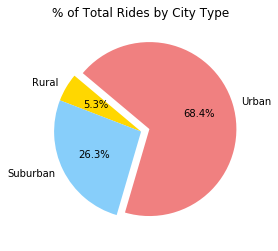

In [8]:
#City Type Percentage Rides of the Whole

types_fare_count = result.groupby('type').agg({'fare': 'count'}) 
types_percents = round((types_fare_count / len(result)) * 100, 2)
colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
plt.pie(types_percents, colors=colors, labels=labels, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1))
plt.title("% of Total Rides by City Type")
plt.savefig("PercentRidesCityType.png")
plt.show()

<h2>Ride Percentages</h2>
<p>Of the whole, rides in urban areas take up more than half of the total demand for rides in Pyber service areas. Ease of adoption with smart phone use in urban areas as well as the demand for more serviceable, clean, and friendly mass transit systems make it easy for city folks to step out to the curb. Ride percentages in suburban areas may actually be pointing to an influx of people into urban areas, increasing (perhaps even inflating) the percentage of urban rides, as those who commuted into urban centers will also need rides back out to the suburbs.</p>
<p>Rural rides are fractional, as long commutes to and from destinations and low driver density contribute to high fares. Rural areas may find adoption of the service to be difficult if there is bad network connectivity from cellular services; income inequality (reducing the adoption of trendy technologies, like smart phones), and age disparity.</p>
<p>Slow adoption is only one indication of the overall problem with service use in rural areas. Lack of trust in the service may also lead to rural folks distancing themselves from services like Pyber. In tight-knight communities, taking rides from a stranger poses significant barriers to Pyber popularity. In addition to incentivizing drivers and riders, it might be wise to implement an outreach campaign that encourages local drivers as opposed to sending urban drivers into rural areas in hopes of cashing in on higher fares.</p>

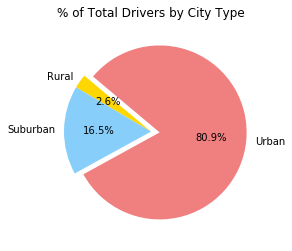

In [9]:
#City Type Percentage Drivers of the Whole

result_clean=result.drop_duplicates(subset='city', keep='first')

drivers_per_city =result_clean.groupby(['type', 'city']).agg({'driver_count': 'sum'})
drivers_per_city_sum = drivers_per_city.sum()
total_drivers_per = result_clean.groupby('type')['driver_count'].sum().reset_index()
total_drivers_per_type = total_drivers_per.set_index('type')
percent = round((total_drivers_per_type / drivers_per_city_sum) * 100, 2)

plt.pie(percent, colors=colors, labels=labels, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1))
plt.title("% of Total Drivers by City Type")
plt.savefig("PercentDriversCityType.png")
plt.show()

<h2>Driver Density</h2>
<p>Driver density is indeed clustered in urban areas where demand for ride share is high. Night life, events, work commutes, and high costs of fuel in urban areas contributes to high demand. However, with such a high driver density, fares in these areas are low, which could lead to a drop-off in drivers as it becomes harder to compete for lucrative rides. </p>
<p>Rural drivers are fractional even compared to suburban drivers. Low driver-density in rural areas keeps fares high, but doesn't insentivize drivers to pick up the slack. In addition to rider incentives, we should be looking at a targeted campaign in rural areas that focuses on some of the key aspects that attract urban riders: long or inconvenient commutes or the security of knowing riders can get a safe ride home after a night out. These reminders that ridesharing is not just for city folks could increase service demands and thus the demand for drivers in rural areas.</p>